In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data 

In [27]:
start = '2010-01-01'
end = '2024-04-08'

df = data.get_data_tiingo('AAPL', api_key='cd979b3785f284399d665e0f55251c969f818226', start = start, end = end)
df.head()

C:\Users\KIIT\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



close    high     low    open    volume  \
symbol date                                                                  
AAPL   2010-01-04 00:00:00+00:00  214.01  214.50  212.38  213.43  17633200   
       2010-01-05 00:00:00+00:00  214.38  215.59  213.25  214.60  21496600   
       2010-01-06 00:00:00+00:00  210.97  215.23  210.75  214.38  19720000   
       2010-01-07 00:00:00+00:00  210.58  212.00  209.05  211.75  17040400   
       2010-01-08 00:00:00+00:00  211.98  212.00  209.06  210.30  15986100   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
AAPL   2010-01-04 00:00:00+00:00  6.470156  6.484970  6.420876  6.452621   
       2010-01-05 00:00:00+00:00  6.481342  6.517924  6.447179  6.487993   
       2010-01-06 00:00:00+00:00  6.378248  6.507040  6.371596  6.481342   
       2010-01-07 00:00:00+00:00  6.366457  6.409388  6.320200  6.401829   
       2010-01-08 00:00:00+00:00  6.408783  6.409388  6.320503  6.357992   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2010-01-04 00:00:00+00:00  493730093      0.0          1.0  
       2010-01-05 00:00:00+00:00  601905401      0.0          1.0  
       2010-01-06 00:00:00+00:00  552160552      0.0          1.0  
       2010-01-07 00:00:00+00:00  477131677      0.0          1.0  
       2010-01-08 00:00:00+00:00  447611247      0.0          1.0

In [28]:
df = df.reset_index()
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2010-01-04 00:00:00+00:00,214.01,214.50,212.38,213.43,17633200,6.470156,6.484970,6.420876,6.452621,493730093,0.0,1.0
1,AAPL,2010-01-05 00:00:00+00:00,214.38,215.59,213.25,214.60,21496600,6.481342,6.517924,6.447179,6.487993,601905401,0.0,1.0
2,AAPL,2010-01-06 00:00:00+00:00,210.97,215.23,210.75,214.38,19720000,6.378248,6.507040,6.371596,6.481342,552160552,0.0,1.0
3,AAPL,2010-01-07 00:00:00+00:00,210.58,212.00,209.05,211.75,17040400,6.366457,6.409388,6.320200,6.401829,477131677,0.0,1.0
4,AAPL,2010-01-08 00:00:00+00:00,211.98,212.00,209.06,210.30,15986100,6.408783,6.409388,6.320503,6.357992,447611247,0.0,1.0


In [29]:
df = df.drop(['symbol', 'date', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis =1)
df.head()

,close,high,low,open,volume
0,214.01,214.50,212.38,213.43,17633200
1,214.38,215.59,213.25,214.60,21496600
2,210.97,215.23,210.75,214.38,19720000
3,210.58,212.00,209.05,211.75,17040400
4,211.98,212.00,209.06,210.30,15986100


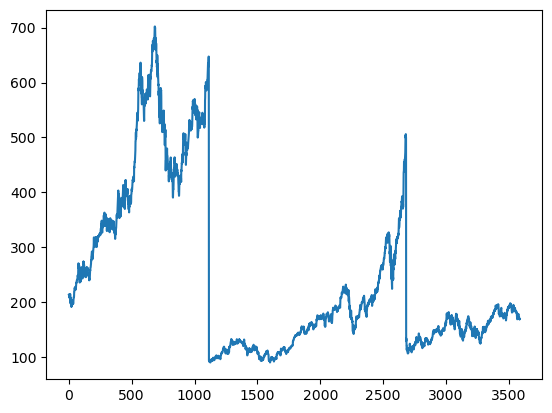

In [30]:
plt.plot(df.close)

In [31]:
#Calculating the moving Avg for 100 values 

ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3583    185.2313
3584    185.1274
3585    185.0057
3586    184.8650
3587    184.7367
Name: close, Length: 3588, dtype: float64

In [32]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add trace for the closing price
fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'))

# Add trace for the moving average (assuming ma100 is already defined)
fig.add_trace(go.Scatter(x=df.index, y=ma100, mode='lines', name='Moving Average (100 days)', line=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Close Price with 100-day Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show plot
fig.show()


In [33]:
ma200 = df.close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3583    183.454525
3584    183.378975
3585    183.297175
3586    183.216675
3587    183.139525
Name: close, Length: 3588, dtype: float64

In [34]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add trace for the closing price
fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'))

# Add trace for the moving average (assuming ma100 and ma200 are already defined)
fig.add_trace(go.Scatter(x=df.index, y=ma100, mode='lines', name='Moving Average (100 days)', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df.index, y=ma200, mode='lines', name='Moving Average (200 days)', line=dict(color='green')))

# Update layout
fig.update_layout(title='Stock Close Price with Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show plot
fig.show()


In [35]:
df.shape 

(3588, 5)

In [37]:
#Splitting data into Train and test 

data_training = pd.DataFrame(df['close'][0: int(len(df)* 0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2511, 1)
(1077, 1)


In [38]:
#Using Min Max scaler since LSTMS are scale variant 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning:

A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4



In [40]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.20223268],
       [0.20283744],
       [0.1972639 ],
       ...,
       [0.31012389],
       [0.3091759 ],
       [0.31662907]])

In [42]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)     

In [45]:
#LSTM Model 

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 


In [50]:
x_train.shape

(2411, 100, 1)

In [51]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [53]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 49s 300ms/step - loss: 0.0647
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 335ms/step - loss: 0.0087
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 399ms/step - loss: 0.0071
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 399ms/step - loss: 0.0094
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 400ms/step - loss: 0.0060
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 395ms/step - loss: 0.0052
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 28s 366ms/step - loss: 0.0052
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 27s 360ms/step - loss: 0.0052
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 28s 363ms/step - loss: 0.0060
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 428ms/step - loss: 0.0044
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 340ms/step - loss: 0.0056
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 347ms/step - loss: 0.0039
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 339ms/step - loss: 0.0036
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 27s 350ms/step - loss: 0.0046
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 27s 

In [55]:
model.save('LSTM_Model.h5')

In [56]:
past_100_days = data_training.tail(100)

In [57]:
final_df = past_100_days.append(data_testing, ignore_index=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_46592\1416317959.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [58]:
final_df.head()

,close
0,204.02
1,193.34
2,197.00
3,199.04
4,203.43


In [60]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.24340639],
       [0.21665623],
       [0.22582342],
       ...,
       [0.15731997],
       [0.15524108],
       [0.15714465]])

In [61]:
input_data.shape

(1177, 1)

In [62]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    

In [63]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1077, 100, 1)
(1077,)


In [64]:
#Making predictions 

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step


In [65]:
y_predicted.shape

(1077, 1)

In [68]:
scaler.scale_

array([0.0025047])

In [70]:
scale_factor = 0.0025047
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

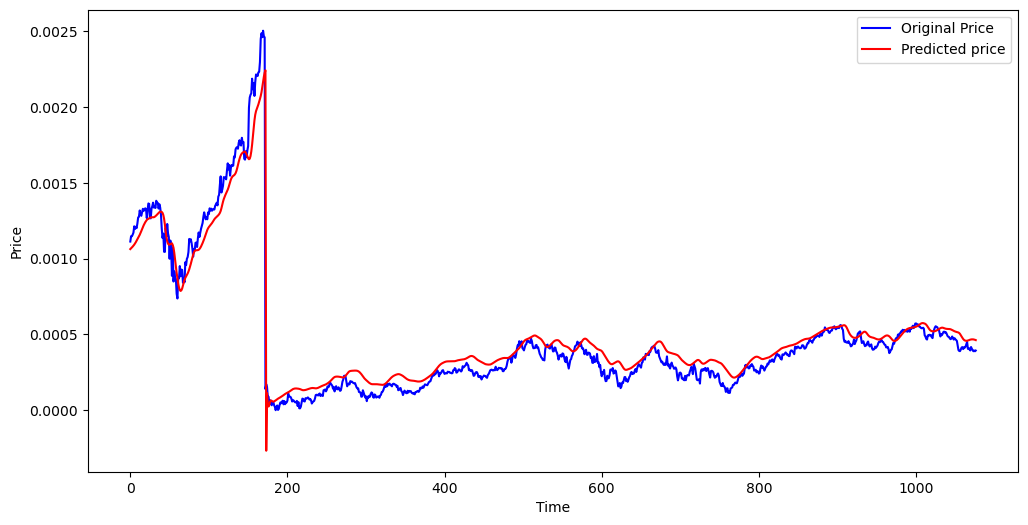

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label ='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()